# CAR PRICE PREDICTION

In [327]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [328]:
cars = pd.read_csv("scrap price.csv")
cars.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploratory Data Analysis

In [329]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   name              205 non-null    object 
 3   fueltypes         205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumbers       205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheels       205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [330]:
cars.columns.value_counts()

ID                  1
symboling           1
highwaympg          1
citympg             1
peakrpm             1
horsepower          1
compressionratio    1
stroke              1
boreratio           1
fuelsystem          1
enginesize          1
cylindernumber      1
enginetype          1
curbweight          1
carheight           1
carwidth            1
carlength           1
wheelbase           1
enginelocation      1
drivewheels         1
carbody             1
doornumbers         1
aspiration          1
fueltypes           1
name                1
price               1
Name: count, dtype: int64

In [331]:
print(cars.dtypes)

ID                    int64
symboling             int64
name                 object
fueltypes            object
aspiration           object
doornumbers          object
carbody              object
drivewheels          object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


In [332]:
cars.isna().sum() # No Null Value.

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

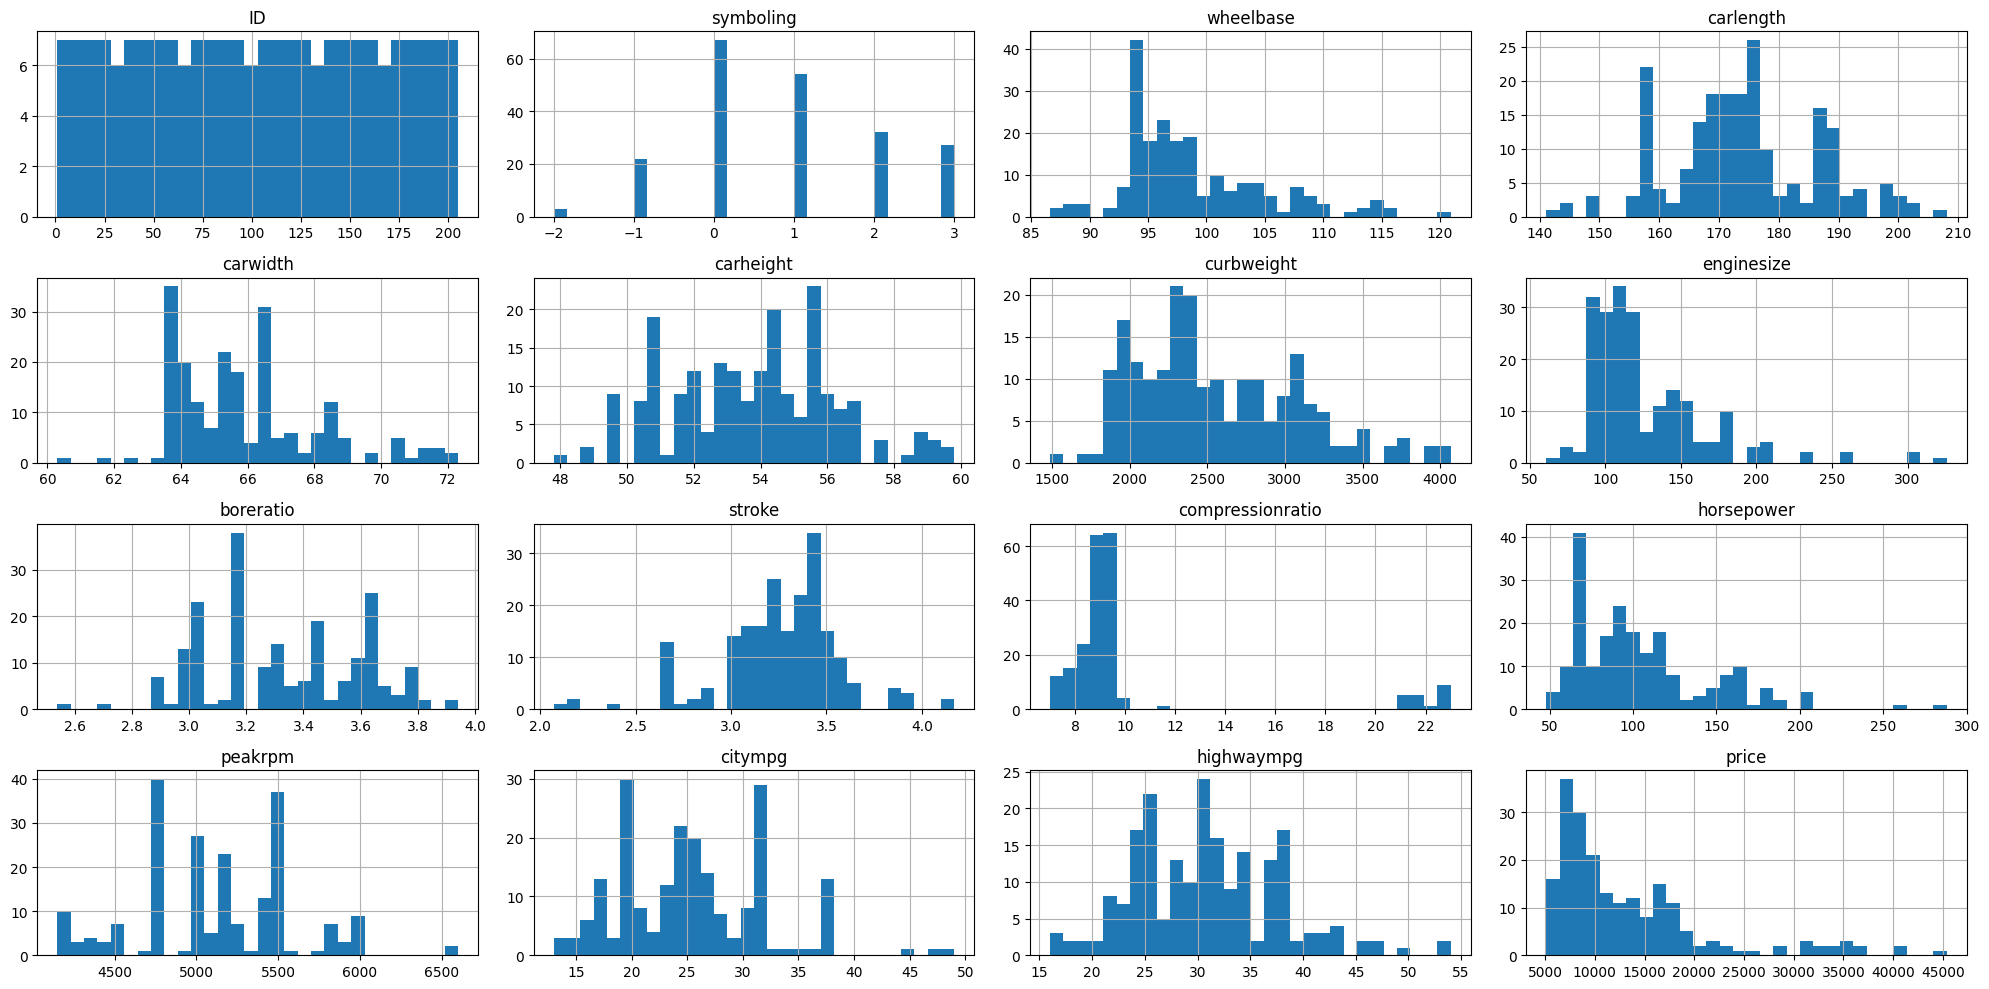

In [333]:
# Checking for Outliers.
cars.hist(figsize=(20,10), bins = 30)

plt.tight_layout()
plt.show()

In [334]:
cars.name.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [335]:
cars.name.nunique() # 147 different cars.

147

In [336]:
cars.fueltypes.unique()

array(['gas', 'diesel'], dtype=object)

In [337]:
cars.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [338]:
cars.doornumbers.unique()

array(['two', 'four'], dtype=object)

In [339]:
cars.drivewheels.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [340]:
cars.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [341]:
cars.enginetype.unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [342]:
cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

## DATA CLEANING

In [343]:
cars.isna().sum()
# There are no null values.

ID                  0
symboling           0
name                0
fueltypes           0
aspiration          0
doornumbers         0
carbody             0
drivewheels         0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

<Axes: >

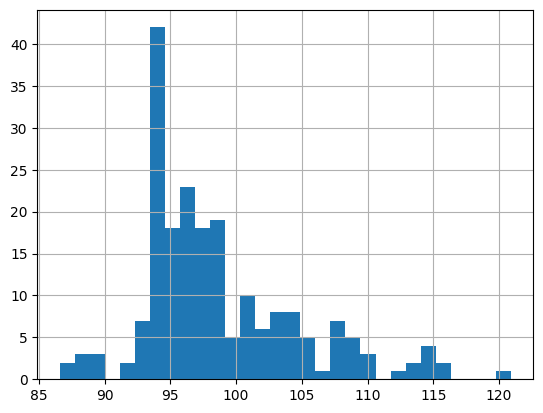

In [344]:
cars['wheelbase'].hist(bins = 30)

In [345]:
cars.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [346]:
Q1 = np.percentile(cars['wheelbase'], 25)
Q3 = np.percentile(cars['wheelbase'], 75)
IQR = Q3 -Q1

lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
print(lower_bound, upper_bound)

82.64999999999999 114.25000000000001


In [347]:
cars[(cars['wheelbase'] > upper_bound) | (cars['wheelbase'] < lower_bound)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0


<Axes: >

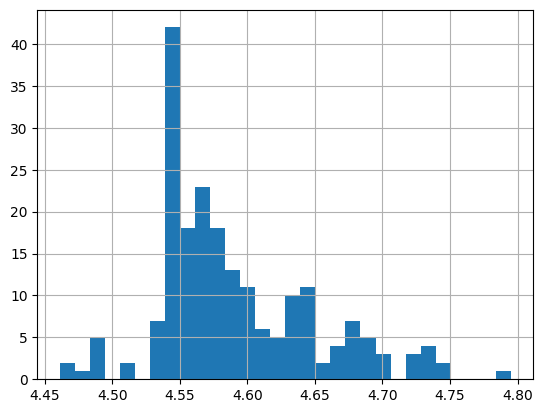

In [348]:
np.log(cars['wheelbase']).hist(bins = 30)

#### Checking Outliers for Car length

<Axes: >

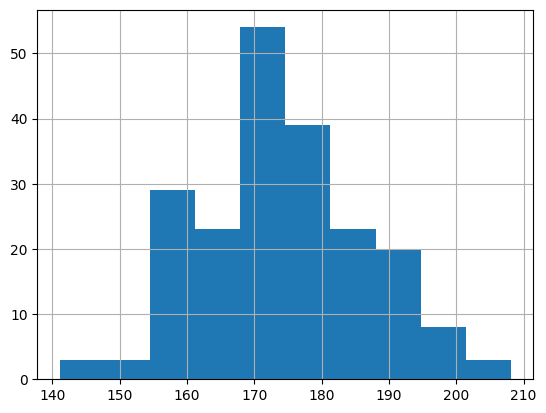

In [349]:
# distribution og carlength
cars['carlength'].hist()
# This is well distributed

In [350]:
Qcarlen1 = np.percentile(cars['carlength'], 25)
Qcarlen3 = np.percentile(cars['carlength'], 75)
IQRcarlen = Qcarlen3 -Qcarlen1

lower_bound_carlen = round(Qcarlen1 -(1.5 * IQRcarlen),1)
upper_bound_carlen = round(Qcarlen3 + (1.5 * IQRcarlen),1)
print(lower_bound_carlen, upper_bound_carlen)

141.1 208.3


In [351]:
cars[(cars['carlength'] > upper_bound_carlen) | (cars['carlength'] < lower_bound_carlen)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


##### No Outlier for car length

#### Car Width

In [352]:
# checking outliers for carwidth
Qcarwidth1 = np.percentile(cars['carwidth'], 25)
Qcarwidth3 = np.percentile(cars['carwidth'], 75)
IQRcarwidth = Qcarwidth3 -Qcarwidth1

lower_bound_carwidth = round(Qcarwidth1 -(1.5 * IQRcarwidth),2)
upper_bound_carwidth = round(Qcarwidth3 + (1.5 * IQRcarwidth),2)
print(lower_bound_carwidth, upper_bound_carwidth)

59.9 71.1


<Axes: >

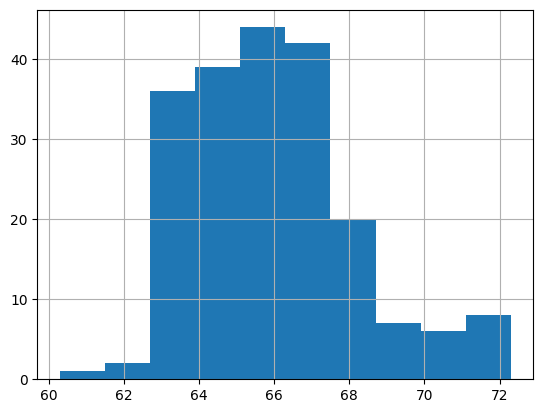

In [353]:
cars['carwidth'].hist()

In [354]:
cars[(cars['carwidth'] > upper_bound_carwidth) | (cars['carwidth'] < lower_bound_carwidth)]
# bring these values down to the upper bound. buick regal sport coupe (turbo) is even 71.6

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.0
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.0
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.0
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


##### reducing car skewness

<Axes: >

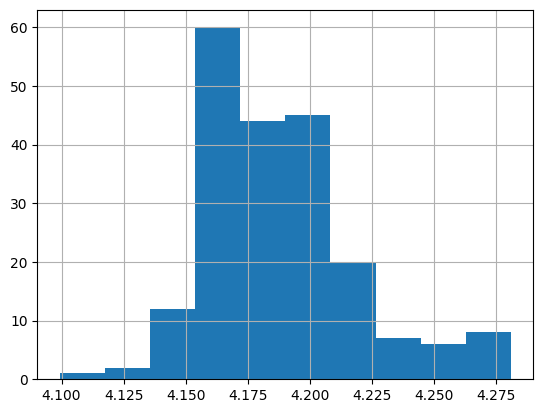

In [355]:
# using log car width to reduce skewness
np.log(cars['carwidth']).hist()

<Axes: >

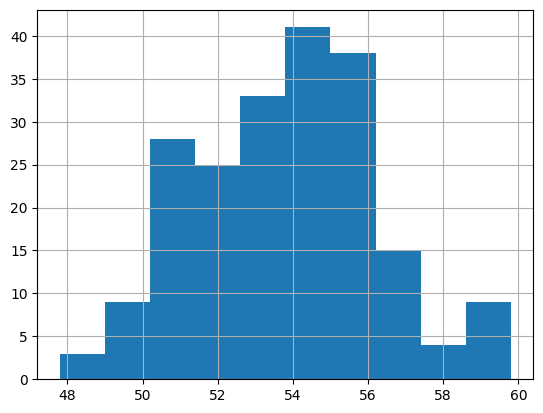

In [356]:
cars.carheight.hist()
# There are no outliers

In [357]:
Qcarheight1 = np.percentile(cars['carheight'], 25)
Qcarheight3 = np.percentile(cars['carheight'], 75)
IQRcarheight = Qcarwidth3 -Qcarwidth1

lower_bound_carheight = round(Qcarheight1 -(1.5 * IQRcarheight),2)
upper_bound_carheight = round(Qcarheight3 + (1.5 * IQRcarheight),2)
print(lower_bound_carheight, upper_bound_carheight)

47.8 59.7


In [358]:
cars[(cars['carheight'] > upper_bound_carheight) | (cars['carheight'] < lower_bound_carheight)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
28,29,-1,dodge dart custom,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.34,3.46,8.5,88,5000,24,30,8921.0
123,124,-1,plymouth valiant,gas,std,four,wagon,fwd,front,103.3,174.6,64.6,59.8,2535,ohc,four,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0


<Axes: >

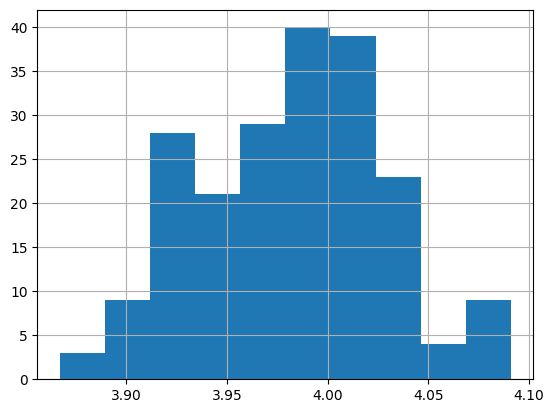

In [359]:
# reducing car height outliers effect.
np.log(cars.carheight).hist()

<Axes: >

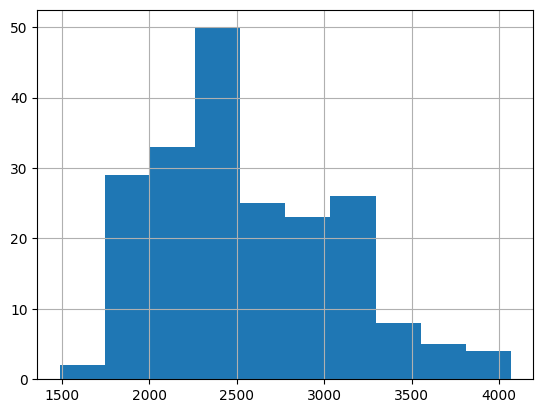

In [360]:
# cars curbweight
cars['curbweight'].hist()

In [361]:
Qcurbweight1 = np.percentile(cars['curbweight'], 25)
Qcurbweight3 = np.percentile(cars['curbweight'], 75)
IQRcurbweight = Qcurbweight3 -Qcurbweight1

lower_bound_curbweight = round(Qcurbweight1 -(1.5 * IQRcurbweight),2)
upper_bound_curbweight = round(Qcurbweight3 + (1.5 * IQRcurbweight),2)
print(lower_bound_curbweight, upper_bound_curbweight)

960.0 4120.0


In [362]:
cars[(cars['curbweight'] > upper_bound_curbweight) | (cars['curbweight'] < lower_bound_curbweight)]
# No Outlier

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<Axes: >

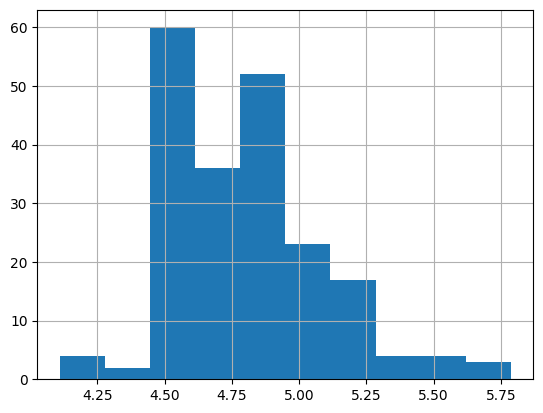

In [363]:
# Engine size
np.log(cars['enginesize']).hist()

In [364]:
Qenginesize1 = np.percentile(cars['enginesize'], 25)
Qenginesize3 = np.percentile(cars['enginesize'], 75)
IQRenginesize = Qenginesize3 -Qenginesize1

lower_bound_enginesize = round(Qenginesize1 -(1.5 * IQRenginesize),2)
upper_bound_enginesize = round(Qenginesize3 + (1.5 * IQRenginesize),2)
print(lower_bound_enginesize, upper_bound_enginesize)

31.0 207.0


In [365]:
cars[(cars['enginesize'] > upper_bound_enginesize) | (cars['enginesize'] < lower_bound_enginesize)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
15,16,0,bmw x4,gas,std,four,sedan,rwd,front,103.5,189.0,66.9,55.7,3230,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,17,0,bmw x5,gas,std,two,sedan,rwd,front,103.5,193.8,67.9,53.7,3380,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,18,0,bmw x3,gas,std,four,sedan,rwd,front,110.0,197.0,70.9,56.3,3505,ohc,six,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
71,72,-1,buick opel isuzu deluxe,gas,std,four,sedan,rwd,front,115.6,202.6,71.7,56.5,3740,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184.0
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,180.3,70.5,50.8,3685,ohcv,eight,234,mpfi,3.46,3.10,8.3,155,4750,16,18,35056.0
73,74,0,buick century special,gas,std,four,sedan,rwd,front,120.9,208.1,71.7,56.7,3900,ohcv,eight,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
74,75,1,buick regal sport coupe (turbo),gas,std,two,hardtop,rwd,front,112.0,199.2,72.0,55.4,3715,ohcv,eight,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0


<Axes: >

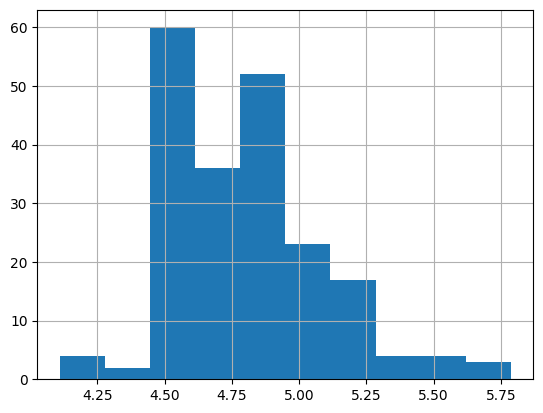

In [366]:
np.log(cars['enginesize']).hist()

<Axes: >

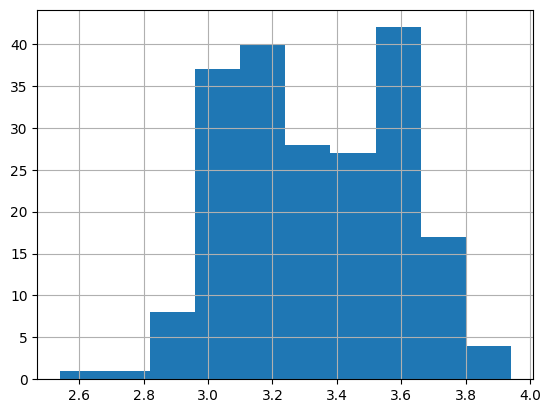

In [367]:
cars['boreratio'].hist()

In [368]:
Qboreratio1 = np.percentile(cars['boreratio'], 25)
Qboreratio3 = np.percentile(cars['boreratio'], 75)
IQRboreratio = Qboreratio3 -Qboreratio1

lower_bound_boreratio = round(Qboreratio1 -(1.5 * IQRboreratio),2)
upper_bound_boreratio = round(Qboreratio3 + (1.5 * IQRboreratio),2)
print(lower_bound_boreratio, upper_bound_boreratio)

2.5 4.23


In [369]:
cars[(cars['boreratio'] > upper_bound_boreratio) | (cars['boreratio'] < lower_bound_boreratio)]
# No outlier 

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


<Axes: >

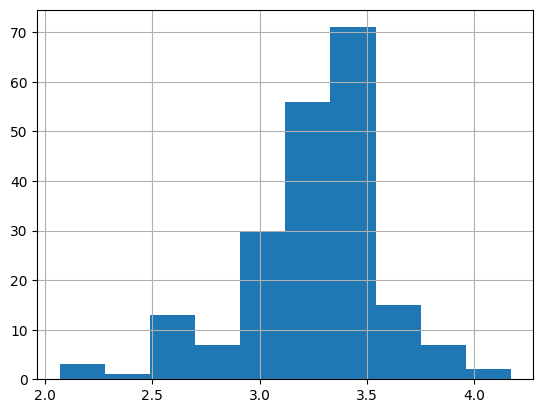

In [370]:
cars['stroke'].hist()

In [371]:
Qstroke1 = np.percentile(cars['stroke'], 25)
Qstroke3 = np.percentile(cars['stroke'], 75)
IQRstroke = Qstroke3 -Qstroke1

lower_bound_stroke = round(Qstroke1 -(1.5 * IQRstroke),2)
upper_bound_stroke = round(Qstroke3 + (1.5 * IQRstroke),2)
print(lower_bound_stroke, upper_bound_stroke)

2.66 3.86


In [372]:
cars[(cars['stroke'] > upper_bound_stroke) | (cars['stroke'] < lower_bound_stroke)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.0
47,48,0,jaguar xj,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,49,0,jaguar xf,gas,std,four,sedan,rwd,front,113.0,199.6,69.6,52.8,4066,dohc,six,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
111,112,0,peugeot 504,gas,std,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3075,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
113,114,0,peugeot 504,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,56.7,3285,l,four,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
130,131,0,renault 12tl,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.0
131,132,2,renault 5 gtl,gas,std,two,hatchback,fwd,front,96.1,176.8,66.6,50.5,2460,ohc,four,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9895.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,56.1,2707,ohc,four,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
138,139,2,subaru,gas,std,two,hatchback,fwd,front,93.7,156.9,63.4,53.7,2050,ohcf,four,97,2bbl,3.62,2.36,9.0,69,4900,31,36,5118.0
139,140,2,subaru dl,gas,std,two,hatchback,fwd,front,93.7,157.9,63.6,53.7,2120,ohcf,four,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053.0


<Axes: >

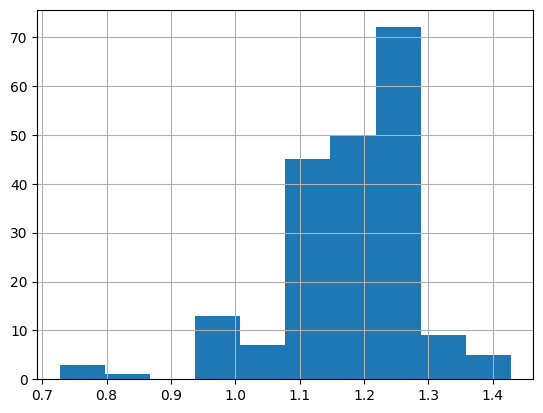

In [373]:
np.log(cars['stroke']).hist()

<Axes: >

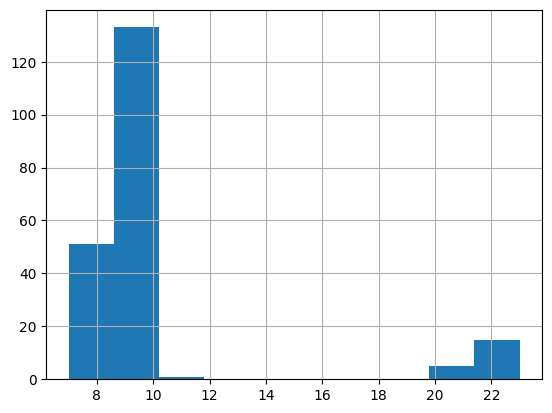

In [374]:
cars['compressionratio'].hist()

In [375]:
Qcompressionratio1 = np.percentile(cars['compressionratio'], 25)
Qcompressionratio3 = np.percentile(cars['compressionratio'], 75)
IQRcompressionratio = Qcompressionratio3 -Qcompressionratio1

lower_bound_compressionratio = round(Qcompressionratio1 -(1.5 * IQRcompressionratio),2)
upper_bound_compressionratio = round(Qcompressionratio3 + (1.5 * IQRcompressionratio),2)
print(lower_bound_compressionratio, upper_bound_compressionratio)

7.4 10.6


<Axes: >

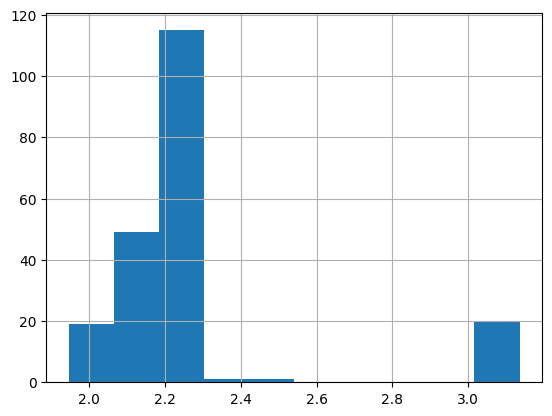

In [376]:
np.log(cars['compressionratio']).hist()

In [377]:
cars[(cars['compressionratio'] > upper_bound_compressionratio) | (cars['compressionratio'] < lower_bound_compressionratio)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
29,30,3,dodge coronet custom (sw),gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2811,ohc,four,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964.000
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.000
63,64,0,mazda glc deluxe,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.000
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.000
67,68,-1,buick electra 225 custom,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,56.5,3515,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,25552.000
68,69,-1,buick century luxus (sw),diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,58.7,3750,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28248.000
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,54.9,3495,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.000
70,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,56.3,3770,ohc,five,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.000
82,83,3,mitsubishi outlander,gas,turbo,two,hatchback,fwd,front,95.9,173.2,66.3,50.2,2833,ohc,four,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.000


<Axes: >

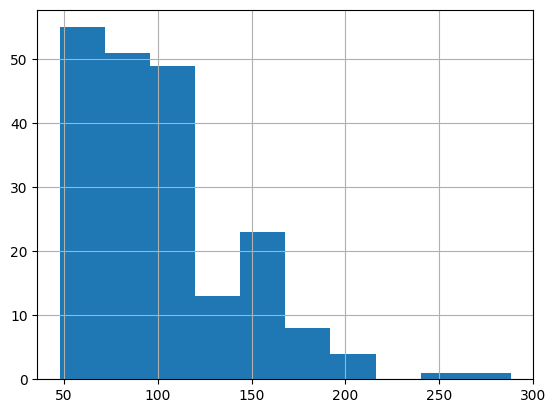

In [378]:
cars['horsepower'].hist()

In [379]:
Qhorsepower1 = np.percentile(cars['horsepower'], 25)
Qhorsepower3 = np.percentile(cars['horsepower'], 75)
IQRhorsepower = Qhorsepower3 -Qhorsepower1

lower_bound_horsepower = round(Qhorsepower1 -(1.5 * IQRhorsepower),2)
upper_bound_horsepower = round(Qhorsepower3 + (1.5 * IQRhorsepower),2)
print(lower_bound_horsepower, upper_bound_horsepower)

1.0 185.0


In [380]:
cars[(cars['horsepower'] > upper_bound_horsepower) | (cars['horsepower'] < lower_bound_horsepower)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
49,50,0,jaguar xk,gas,std,two,sedan,rwd,front,102.0,191.7,70.6,47.8,3950,ohcv,twelve,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
105,106,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,170.7,67.9,49.7,3139,ohcv,six,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699.0
126,127,3,porcshce panamera,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0
127,128,3,porsche cayenne,gas,std,two,hardtop,rwd,rear,89.5,168.9,65.0,51.6,2756,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0
128,129,3,porsche boxter,gas,std,two,convertible,rwd,rear,89.5,168.9,65.0,51.6,2800,ohcf,six,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,175.7,72.3,50.5,3366,dohcv,eight,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


<Axes: >

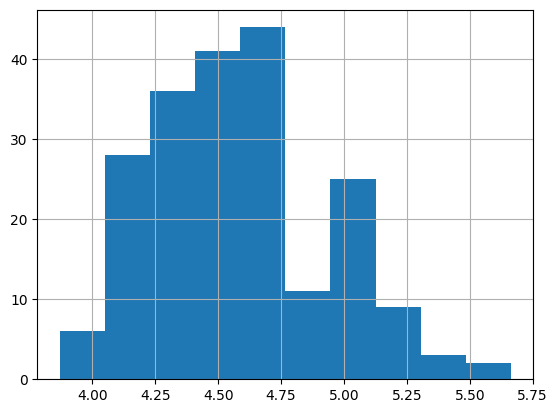

In [381]:
np.log(cars['horsepower']).hist()

<Axes: >

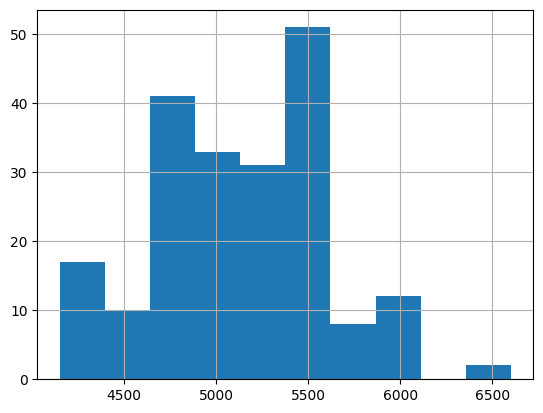

In [382]:
cars['peakrpm'].hist()

In [383]:
Qpeakrpm1 = np.percentile(cars['peakrpm'], 25)
Qpeakrpm3 = np.percentile(cars['peakrpm'], 75)
IQRpeakrpm = Qpeakrpm3 -Qpeakrpm1

lower_bound_peakrpm = round(Qpeakrpm1 -(1.5 * IQRpeakrpm),2)
upper_bound_peakrpm = round(Qpeakrpm3 + (1.5 * IQRpeakrpm),2)
print(lower_bound_peakrpm, upper_bound_peakrpm)

3750.0 6550.0


In [384]:
cars[(cars['peakrpm'] > upper_bound_peakrpm) | (cars['peakrpm'] < lower_bound_peakrpm)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
165,166,1,toyota celica gt liftback,gas,std,two,sedan,rwd,front,94.5,168.7,64.0,52.6,2265,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9298.0
166,167,1,toyota corolla tercel,gas,std,two,hatchback,rwd,front,94.5,168.7,64.0,52.6,2300,dohc,four,98,mpfi,3.24,3.08,9.4,112,6600,26,29,9538.0


<Axes: >

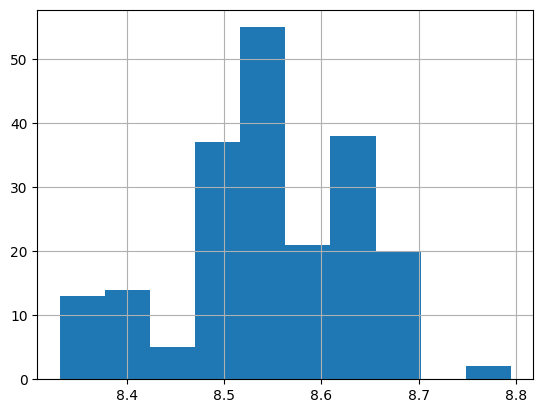

In [385]:
np.log(cars['peakrpm']).hist()

<Axes: >

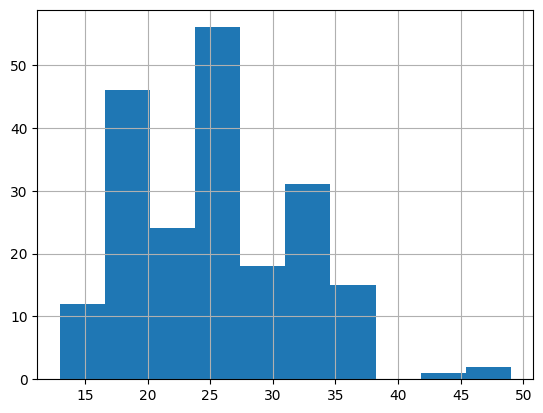

In [386]:
cars['citympg'].hist()

In [387]:
Qcitympg1 = np.percentile(cars['citympg'], 25)
Qcitympg3 = np.percentile(cars['citympg'], 75)
IQRcitympg = Qcitympg3 -Qcitympg1

lower_bound_citympg = round(Qcitympg1 -(1.5 * IQRcitympg),2)
upper_bound_citympg = round(Qcitympg3 + (1.5 * IQRcitympg),2)
print(lower_bound_citympg, upper_bound_citympg)

2.5 46.5


In [388]:
cars[(cars['citympg'] > upper_bound_citympg) | (cars['citympg'] < lower_bound_citympg)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0


<Axes: >

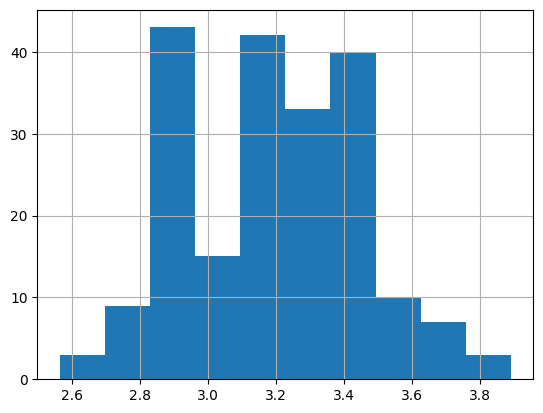

In [389]:
np.log(cars['citympg']).hist()

<Axes: >

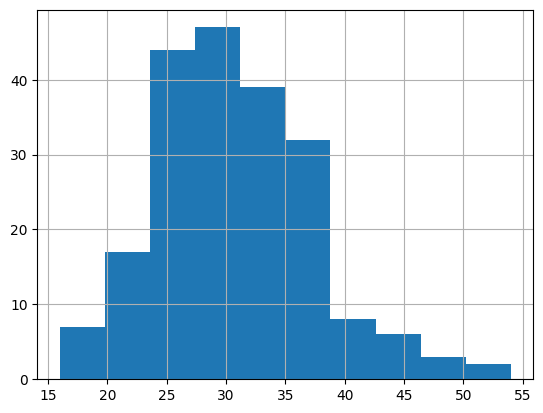

In [390]:
cars['highwaympg'].hist()

In [391]:
Qhighwaympg1 = np.percentile(cars['highwaympg'], 25)
Qhighwaympg3 = np.percentile(cars['highwaympg'], 75)
IQRhighwaympg = Qhighwaympg3 -Qhighwaympg1

lower_bound_highwaympg = round(Qhighwaympg1 -(1.5 * IQRhighwaympg),2)
upper_bound_highwaympg = round(Qhighwaympg3 + (1.5 * IQRhighwaympg),2)
print(lower_bound_highwaympg, upper_bound_highwaympg)

11.5 47.5


In [392]:
cars[(cars['highwaympg'] > upper_bound_highwaympg) | (cars['highwaympg'] < lower_bound_highwaympg)]

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,141.1,60.3,53.2,1488,l,three,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
30,31,2,honda civic,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,50.8,1713,ohc,four,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479.0
90,91,1,nissan gt-r,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,54.5,2017,ohc,four,103,idi,2.99,3.47,21.9,55,4800,45,50,7099.0


<Axes: >

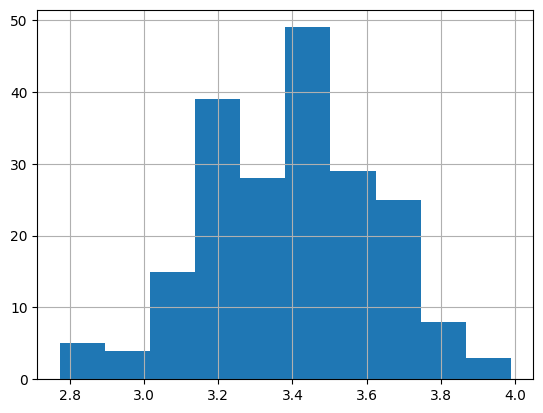

In [393]:
np.log(cars['highwaympg']).hist()

<Axes: >

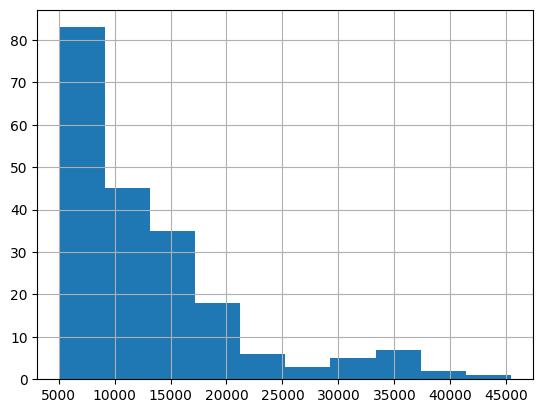

In [394]:
cars['price'].hist()

<Axes: >

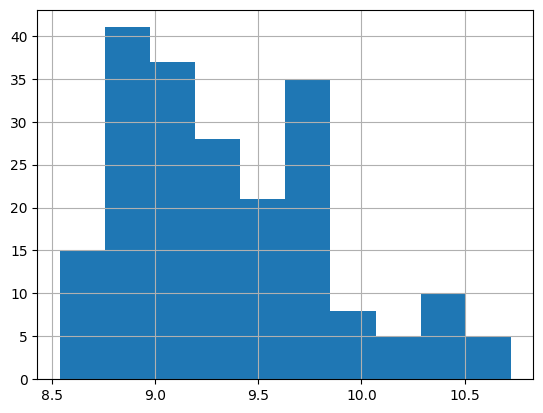

In [395]:
np.log(cars['price']).hist()

##### So far, I have been able to identify columns that are skewed and have decided to Transform them to limit their skewness since the data is attributed to a particular vehicle type which are in most cases highly rated vehicles, their values appear to be valid even though statistics will see them as outliers. The columns are

* wheelbase
* carwidth
* carheight
* Enginesize
* stroke
* compressionratio
* horsepower
* peakrpm
* citympg
* highwaympg
* prize 

In [396]:
cars.columns

Index(['ID', 'symboling', 'name', 'fueltypes', 'aspiration', 'doornumbers',
       'carbody', 'drivewheels', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [397]:
# creating log columns
cars['log_wheelbase'] = np.log(cars.iloc[:,9])
cars['log_carwidth'] = np.log(cars.iloc[:,11])
cars['log_height'] = np.log(cars.iloc[:,12])
cars['log_enginesize'] = np.log(cars.iloc[:,16])
cars['log_stroke'] = np.log(cars.iloc[:,19])
cars['log_compressionratio'] = np.log(cars.iloc[:,20])
cars['log_horsepower'] = np.log(cars.iloc[:,21])
cars['log_peakrpm'] = np.log(cars.iloc[:,22])
cars['log_cityrpg'] = np.log(cars.iloc[:,23])
cars['log_highwaympg'] = np.log(cars.iloc[:,24])
cars['log_price'] = np.log(cars.iloc[:,25])
   


In [398]:
cars.head()

,ID,symboling,name,fueltypes,aspiration,doornumbers,carbody,drivewheels,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,log_wheelbase,log_carwidth,log_height,log_enginesize,log_stroke,log_compressionratio,log_horsepower,log_peakrpm,log_cityrpg,log_highwaympg,log_price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,4.484132,4.160444,3.887730,4.867534,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.510075
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,4.484132,4.160444,3.887730,4.867534,0.985817,2.197225,4.709530,8.517193,3.044522,3.295837,9.711116
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,4.548600,4.182050,3.958907,5.023881,1.244155,2.197225,5.036953,8.517193,2.944439,3.258097,9.711116
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,4.603168,4.192680,3.994524,4.691348,1.223775,2.302585,4.624973,8.612503,3.178054,3.401197,9.543235
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,4.599152,4.195697,3.994524,4.912655,1.223775,2.079442,4.744932,8.612503,2.890372,3.091042,9.767095


In [399]:
cars.shape

(205, 37)

In [400]:
# Dropping some columns 
columns_to_drop = ['ID','name','wheelbase','carlength','carheight',
 'enginesize', 'stroke', 'compressionratio','horsepower','peakrpm','citympg','highwaympg', 'price']


cars_transformed = cars.drop(columns = columns_to_drop, inplace = True)

In [401]:
cars_transformed = cars

C:\Users\MarioGozie\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


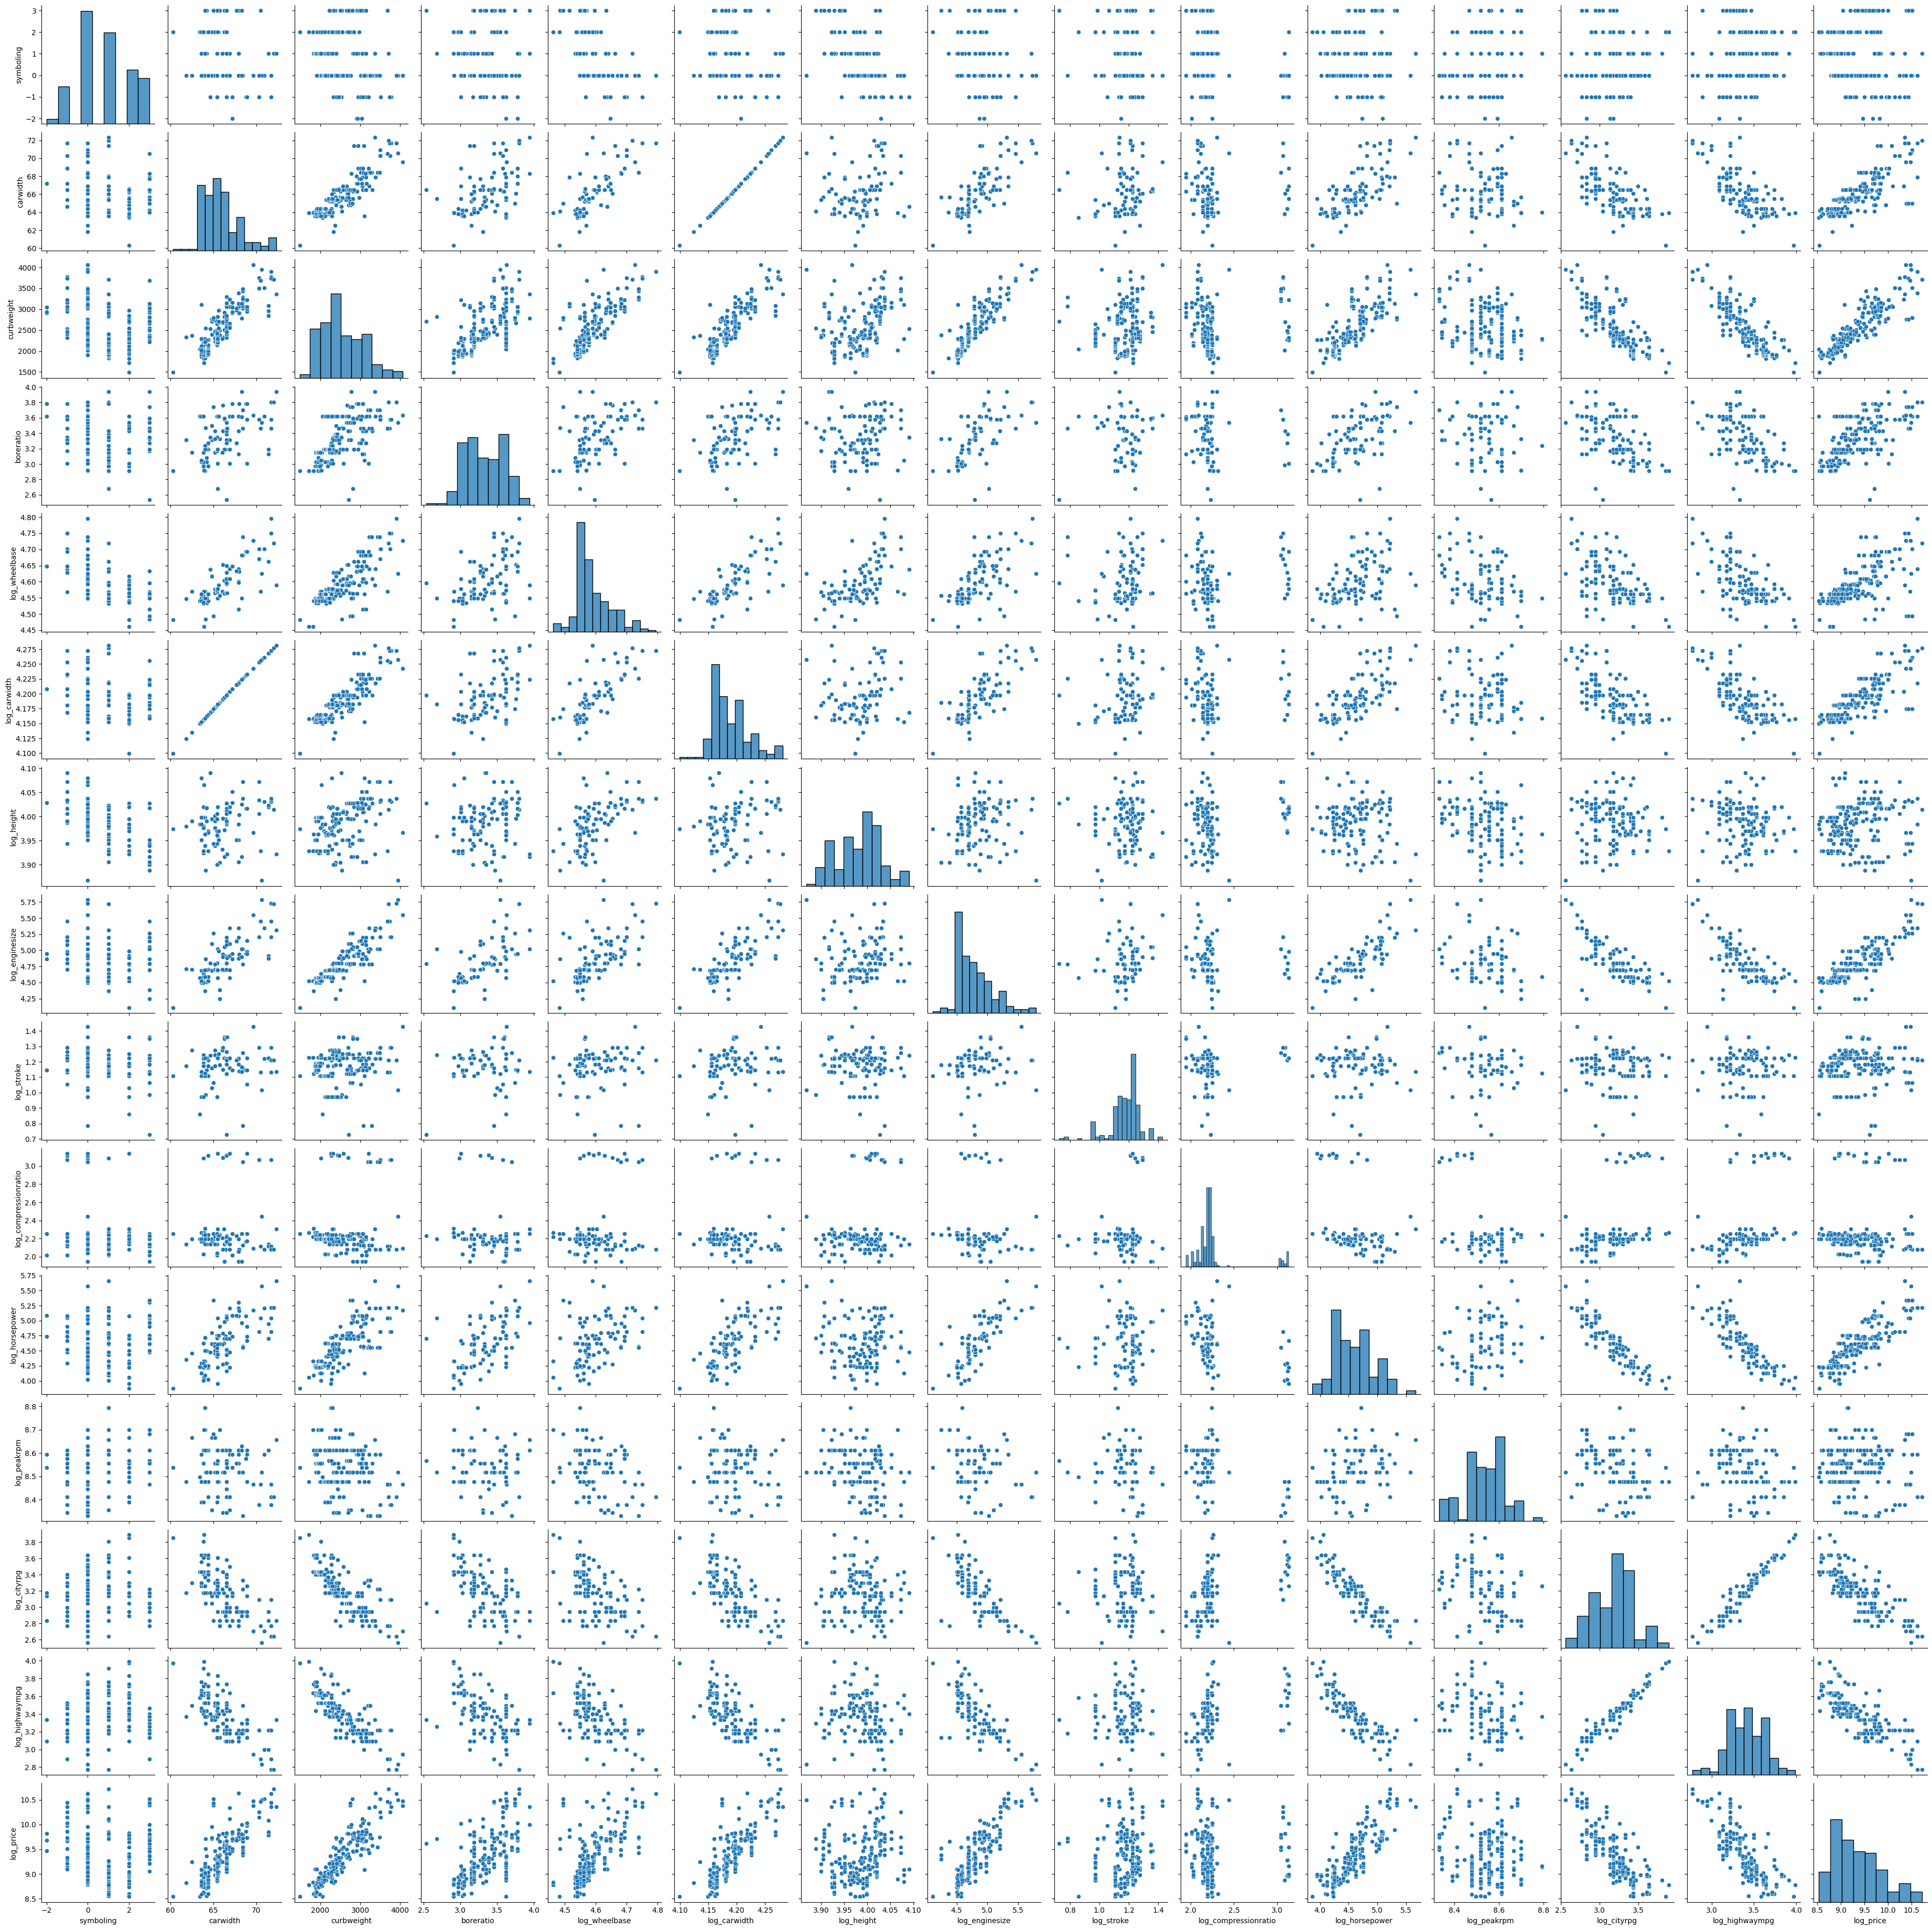

In [402]:
sns.pairplot(cars_transformed)

In [403]:
# importing test and split
from sklearn.model_selection import train_test_split

In [404]:
cars_transformed.columns

Index(['symboling', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'log_wheelbase',
       'log_carwidth', 'log_height', 'log_enginesize', 'log_stroke',
       'log_compressionratio', 'log_horsepower', 'log_peakrpm', 'log_cityrpg',
       'log_highwaympg', 'log_price'],
      dtype='object')

In [405]:
# Xvariable,Yvariable
xvariable = cars_transformed[['symboling', 'fueltypes', 'aspiration', 'doornumbers', 'carbody',
       'drivewheels', 'enginelocation', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'log_wheelbase',
       'log_carwidth', 'log_height', 'log_enginesize', 'log_stroke',
       'log_compressionratio', 'log_horsepower', 'log_peakrpm', 'log_cityrpg',
       'log_highwaympg']]

yvariable = cars_transformed['log_price']

In [406]:
xtrain, xtest, ytrain, ytest = train_test_split(xvariable, yvariable, test_size = 0.3, random_state = 42)

In [407]:
# creating ols formula

ols_formula = "log_price ~ symboling + C(fueltypes) + C(aspiration) + C(doornumbers) + C(carbody) + C(drivewheels) + C(enginelocation) + carwidth + curbweight + C(enginetype) +C(cylindernumber) + C(fuelsystem) + boreratio + log_wheelbase  + log_carwidth + log_height + log_enginesize + log_stroke+ log_compressionratio + log_horsepower + log_peakrpm + log_cityrpg +log_highwaympg"

In [408]:
# improting ols
from statsmodels.formula.api import ols

In [409]:
ols_data = pd.concat([xtrain,ytrain], axis = 1)

In [410]:
OLS = ols(formula = ols_formula, data = ols_data )

In [411]:
model = OLS.fit()

In [412]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     47.24
Date:                Mon, 14 Aug 2023   Prob (F-statistic):           2.73e-50
Time:                        23:04:30   Log-Likelihood:                 106.40
No. Observations:                 143   AIC:                            -132.8
Df Residuals:                     103   BIC:                            -14.29
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      45.8801     69.243      0.663      0.509     -91.446     183.207
C(fueltypes)[T.gas]            22.9745     34.630      0.663      0.509     -45.706      91.655
C(aspiration)[T.turbo]          0.0151      0.068      0.221      0.825      -0.120       0.150
C(doornumbers)[T.two]          -0.0106      0.046     -0.230      0.818      -0.102       0.081
C(carbody)[T.hardtop]          -0.2279      0.130     -1.750      0.083      -0.486       0.030
C(carbody)[T.hatchback]        -0.2531      0.085     -2.964      0.004      -0.423      -0.084
C(carbody)[T.sedan]            -0.1961      0.092     -2.126      0.036      -0.379      -0.013
C(carbody)[T.wagon]            -0.2936      0.103     -2.837      0.005      -0.499      -0.088
C(drivewheels)[T.fwd]          -0.1507      0.103     -1.470      0.145      -0.354       0.053
C(drivewheels)[T.rwd]          -0.1306      0.115     -1.131      0.261      -0.360       0.098
C(enginelocation)[T.rear]       0.5447      0.223      2.443      0.016       0.102       0.987
C(enginetype)[T.dohcv]         -0.6265      0.300     -2.088      0.039      -1.222      -0.031
C(enginetype)[T.l]             -0.0257      0.110     -0.232      0.817      -0.245       0.193
C(enginetype)[T.ohc]            0.1616      0.064      2.542      0.013       0.036       0.288
C(enginetype)[T.ohcf]          -0.1176      0.122     -0.960      0.339      -0.361       0.125
C(enginetype)[T.ohcv]          -0.1642      0.094     -1.747      0.084      -0.351       0.022
C(enginetype)[T.rotor]         -0.1699      0.168     -1.009      0.315      -0.504       0.164
C(cylindernumber)[T.five]      -0.4499      0.175     -2.565      0.012      -0.798      -0.102
C(cylindernumber)[T.four]      -0.4876      0.215     -2.267      0.025      -0.914      -0.061
C(cylindernumber)[T.six]       -0.2951      0.170     -1.740      0.085      -0.631       0.041
C(cylindernumber)[T.twelve]    -0.4856      0.250     -1.940      0.055      -0.982       0.011
C(cylindernumber)[T.two]       -0.1699      0.168     -1.009      0.315      -0.504       0.164
C(fuelsystem)[T.2bbl]          -0.0778      0.064     -1.219      0.225      -0.204       0.049
C(fuelsystem)[T.4bbl]           0.0670      0.209      0.320      0.750      -0.348       0.482
C(fuelsystem)[T.idi]           22.9057     34.613      0.662      0.510     -45.742      91.553
C(fuelsystem)[T.mpfi]           0.0019      0.071      0.026      0.979      -0.139       0.142
C(fuelsystem)[T.spdi]          -0.1213      0.101     -1.197      0.234      -0.322       0.080
C(fuelsystem)[T.spfi]          -0.0363      0.161     -0.225      0.822      -0.356       0.284
symboling                       0.0058      0.018      0.315      0.754      -0.031       0.042
carwidth   

##### Basically looking at the model I have here, there are some variables that do not contribute to the model. These are values that have pvalue above 0.05 so they need to be removed.

In [431]:
xvariable = cars_transformed[[ 'carbody',
       'enginelocation', 'curbweight', 'log_carwidth', 'enginetype',
       'cylindernumber',  
       'log_enginesize', 'log_stroke',
       'log_compressionratio', 'log_horsepower']]

yvariable = cars_transformed['log_price']

In [432]:
xtrain, xtest, ytrain, ytest = train_test_split(xvariable, yvariable, test_size = 0.3, random_state = 42)

In [433]:
ols_formula = "log_price ~  C(carbody) + C(enginelocation)  + C(enginetype) +C(cylindernumber) + curbweight  + log_carwidth + log_enginesize + log_stroke+ log_compressionratio + log_horsepower"

In [434]:
from statsmodels.formula.api import ols

In [435]:
ols_data = pd.concat([xtrain,ytrain], axis = 1)

In [436]:
OLS = ols(formula = ols_formula, data = ols_data )

In [437]:
model = OLS.fit()

In [438]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     87.54
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           6.16e-63
Time:                        00:39:58   Log-Likelihood:                 95.396
No. Observations:                 143   AIC:                            -146.8
Df Residuals:                     121   BIC:                            -81.61
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -4.4303      3.527     -1.256      0.211     -11.412       2.552
C(carbody)[T.hardtop]          -0.1896      0.120     -1.580      0.117      -0.427       0.048
C(carbody)[T.hatchback]        -0.2742      0.074     -3.730      0.000      -0.420      -0.129
C(carbody)[T.sedan]            -0.1988      0.073     -2.717      0.008      -0.344      -0.054
C(carbody)[T.wagon]            -0.3017      0.082     -3.687      0.000      -0.464      -0.140
C(enginelocation)[T.rear]       0.4926      0.174      2.825      0.006       0.147       0.838
C(enginetype)[T.dohcv]         -0.5218      0.204     -2.557      0.012      -0.926      -0.118
C(enginetype)[T.l]             -0.0006      0.082     -0.007      0.995      -0.163       0.162
C(enginetype)[T.ohc]            0.1663      0.055      3.016      0.003       0.057       0.275
C(enginetype)[T.ohcf]          -0.0918      0.086     -1.064      0.289      -0.263       0.079
C(enginetype)[T.ohcv]          -0.1918      0.080     -2.384      0.019      -0.351      -0.033
C(enginetype)[T.rotor]         -0.0189      0.105     -0.179      0.858      -0.227       0.189
C(cylindernumber)[T.five]      -0.3257      0.148     -2.200      0.030      -0.619      -0.033
C(cylindernumber)[T.four]      -0.4298      0.147     -2.923      0.004      -0.721      -0.139
C(cylindernumber)[T.six]       -0.2576      0.126     -2.049      0.043      -0.506      -0.009
C(cylindernumber)[T.twelve]    -0.4977      0.182     -2.728      0.007      -0.859      -0.136
C(cylindernumber)[T.two]       -0.0189      0.105     -0.179      0.858      -0.227       0.189
curbweight                      0.0004    8.5e-05      4.798      0.000       0.000       0.001
log_carwidth                    2.5365      0.894      2.838      0.005       0.767       4.306
log_enginesize                  0.0225      0.176      0.128      0.899      -0.326       0.371
log_stroke                     -0.6370      0.154     -4.128      0.000      -0.943      -0.332
log_compressionratio            0.1706      0.059      2.905      0.004       0.054       0.287
log_horsepower                  0.6286      0.096      6.530      0.000       0.438       0.819
==============================================================================
Omnibus:                        1.749   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.417   Jarque-Bera (JB):                1.675
Skew:                           0.262   Prob(JB):                        0.433
Kurtosis:                       2.922   Cond. No.                     1.29e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The small

##### The Model performed well but there is still need to remove some variable that do not add up

In [455]:
xvariable = cars_transformed[[ 
       'enginelocation', 'curbweight', 'log_carwidth',  
       'log_horsepower']]

yvariable = cars_transformed['log_price']

In [456]:
xtrain, xtest, ytrain, ytest = train_test_split(xvariable, yvariable, test_size = 0.3, random_state = 42)

In [457]:
ols_formula = "log_price ~  C(enginelocation)  + curbweight  + log_carwidth  + log_horsepower"

In [458]:

from statsmodels.formula.api import ols

In [459]:
ols_data = pd.concat([xtrain,ytrain], axis = 1)

In [460]:
OLS = ols(formula = ols_formula, data = ols_data )

In [462]:
model = OLS.fit()

In [463]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     258.2
Date:                Tue, 15 Aug 2023   Prob (F-statistic):           5.17e-63
Time:                        01:14:35   Log-Likelihood:                 49.190
No. Observations:                 143   AIC:                            -88.38
Df Residuals:                     138   BIC:                            -73.57
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -8.0658      3.408     -2.367      0.019     -14.804      -1.328
C(enginelocation)[T.rear]     0.6714      0.135      4.973      0.000       0.404       0.938
curbweight                    0.0004   6.15e-05      6.948      0.000       0.000       0.001
log_carwidth                  3.3685      0.842      4.001      0.000       1.704       5.033
log_horsepower                0.4813      0.072      6.709      0.000       0.339       0.623
==============================================================================
Omnibus:                       13.362   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.200
Skew:                           0.714   Prob(JB):                     0.000825
Kurtosis:                       3.585   Cond. No.                     6.31e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

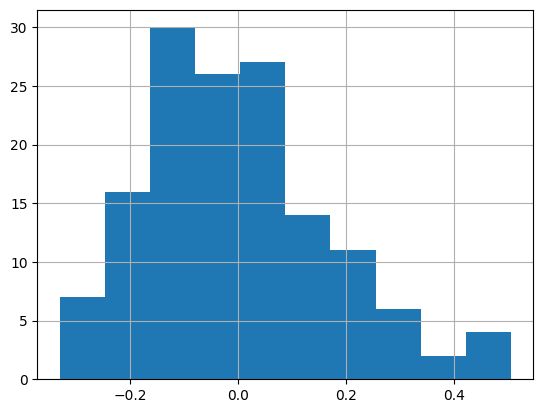

In [465]:
model.resid.hist()

In [467]:
residuals = model.resid

In [466]:
fitted_values = model.predict(xtrain)

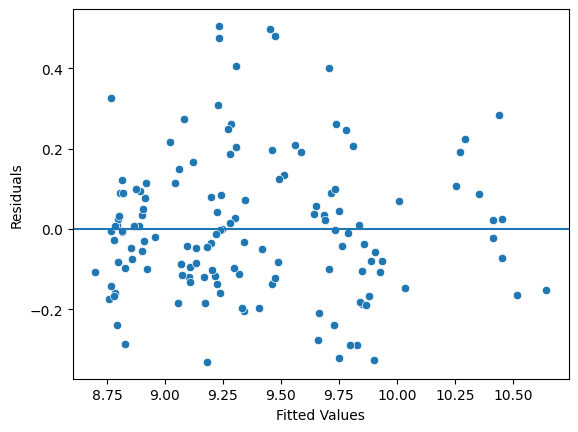

In [468]:


fig = sns.scatterplot(x = fitted_values, y = residuals )
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

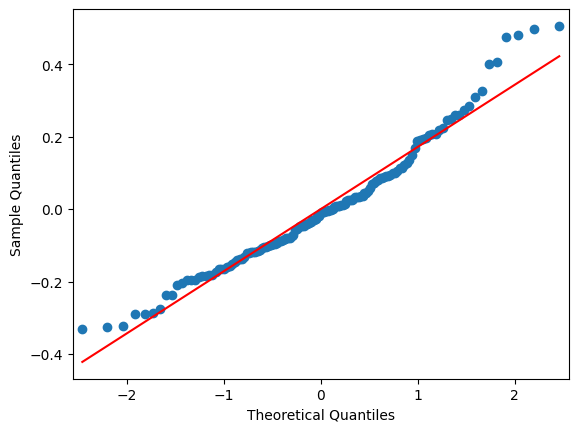

In [469]:
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()